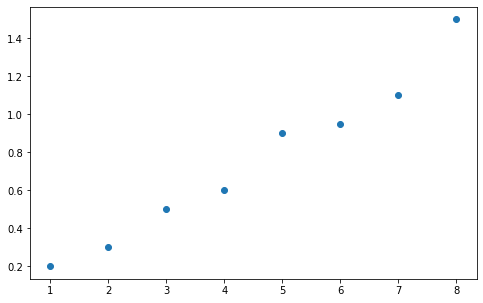

epoch = 0, 기울기 = 0.0260, 절편 = 0.0045
epoch = 100, 기울기 = 0.1656, 절편 = 0.0220
epoch = 200, 기울기 = 0.1668, 절편 = 0.0157
epoch = 300, 기울기 = 0.1678, 절편 = 0.0101
epoch = 400, 기울기 = 0.1686, 절편 = 0.0051
epoch = 500, 기울기 = 0.1694, 절편 = 0.0007
epoch = 600, 기울기 = 0.1701, 절편 = -0.0032
epoch = 700, 기울기 = 0.1707, 절편 = -0.0067
epoch = 800, 기울기 = 0.1713, 절편 = -0.0097
epoch = 900, 기울기 = 0.1718, 절편 = -0.0125
epoch = 1000, 기울기 = 0.1722, 절편 = -0.0149
epoch = 1100, 기울기 = 0.1726, 절편 = -0.0170
epoch = 1200, 기울기 = 0.1729, 절편 = -0.0190
epoch = 1300, 기울기 = 0.1732, 절편 = -0.0206
epoch = 1400, 기울기 = 0.1735, 절편 = -0.0221
epoch = 1500, 기울기 = 0.1737, 절편 = -0.0235
epoch = 1600, 기울기 = 0.1739, 절편 = -0.0247
epoch = 1700, 기울기 = 0.1741, 절편 = -0.0257
epoch = 1800, 기울기 = 0.1743, 절편 = -0.0266
epoch = 1900, 기울기 = 0.1744, 절편 = -0.0275
epoch = 2000, 기울기 = 0.1746, 절편 = -0.0282
epoch = 2100, 기울기 = 0.1747, 절편 = -0.0288
epoch = 2200, 기울기 = 0.1748, 절편 = -0.0294
epoch = 2300, 기울기 = 0.1749, 절편 = -0.0299
epoch = 2400, 기울기 = 0.1750, 절편 = -

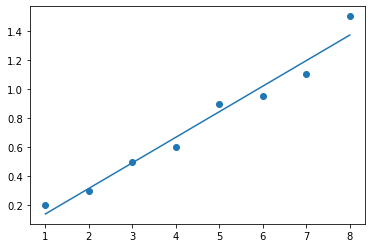

In [1]:
#물고기 사육주수 data를 통해 경사하강법 구현하고 결과 확인해보기
#a = 0.1756, b = -0.03392와 같거나 유사값이 나와야 한다
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [[1,0.2], [2,0.3], [3,0.5], [4,0.6], [5,0.9], [6,0.95], [7,1.1], [8,1.5]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#그래프로 나타내기
plt.figure(figsize = (8, 5))
plt.scatter(x, y)
plt.show()

#a, b 초기화
a = 0
b = 0

#리스트로 되어있는 x와 y의 값 넘파이 배열로 바꾸기
X = np.array(x)
Y = np.array(y)

#학습률 정하기
lr = 0.003    #이걸 어떻게 설정하는지에 따라 결과가 달라진다

#몇 번 반복될지 설정
epochs = 5001    #5000번 쯤에서 값이 수렴하는것 같다

#경사하강법 시작
for i in range(epochs):
  a_diff = 2/len(X) * sum((a*X + b - Y) * X)
  b_diff = 2/len(X) * sum(a*X + b - Y)

  #a, b의 값 변경
  a = a - lr * a_diff
  b = b - lr * b_diff

  if i%100 == 0:
    print("epoch = %.f, 기울기 = %.04f, 절편 = %.04f" %(i,a,b))

#그래프로 다시 그리기
y_pred = a * X + b    #예측값
plt.scatter(x, y)
plt.plot(X, y_pred)
plt.show()

In [2]:
#텐서플로우 사용
#Tensor로 이루어진 결과는 Session 안에서 돌아가야 실행한다

#import tensorflow as tf <- 이렇게 하면 Session()없다고 에러 뜬다
# 1.x에서 쓰던 코딩은 2.x에서는 대부분 안된다

import tensorflow.compat.v1 as tf    # 1.x 버전을 임포트
tf.disable_v2_behavior()             # 2.x 버전을 비활성화

a = tf.constant(7.0, name = 'data1')
b = tf.constant(3.0, name = 'data2')
c = tf.constant(2.0, name = 'data3')

v = a * b / c

print(v)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  print(sess.run(v))    #warning은 무시한다

Instructions for updating:
non-resource variables are not supported in the long term
Tensor("truediv:0", shape=(), dtype=float32)
10.5
